<a href="https://colab.research.google.com/github/adityabaidya7/INFY_StockPricePrediction/blob/main/SimpleRNN_with_RL_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import SimpleRNN
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-17


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training SimpleRNN model...
Epoch 1/1000


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2442 - val_loss: 0.0324
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0161
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - val_loss: 0.0125
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 0.0090
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 0.0075
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0064
Epoch 7/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0057
Epoch 8/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 9/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 10/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 11/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 12/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0

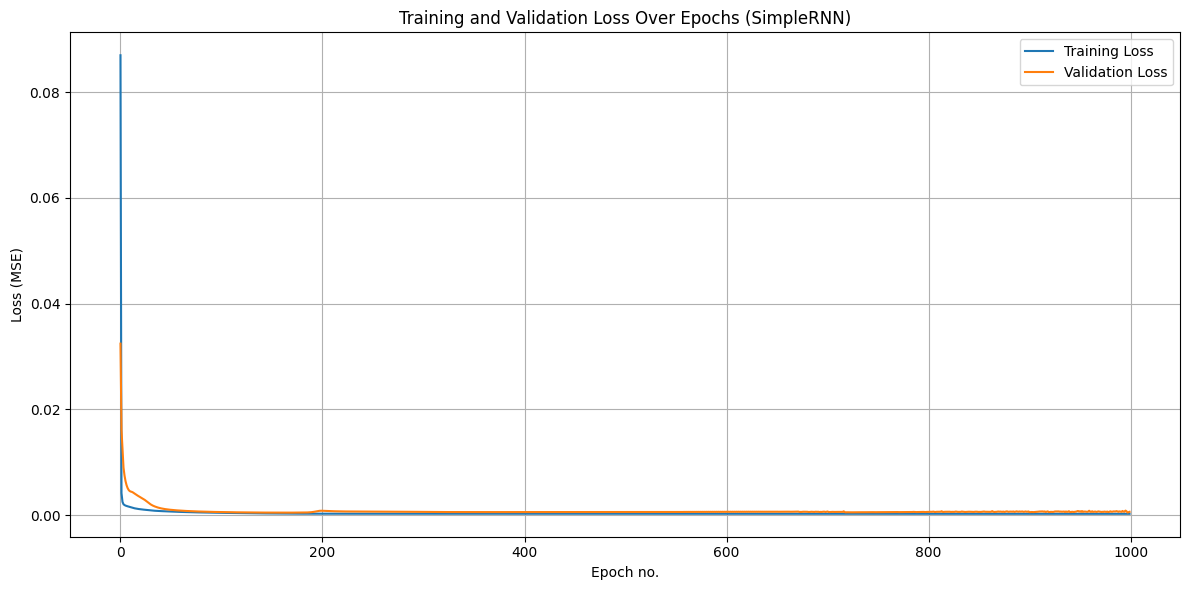


 Training Set Performance Metrics (SimpleRNN):
 Mean Absolute Error (MAE) : ₹15.42
 Mean Squared Error (MSE)  : ₹431.16
 Root Squared Error (RMSE) : ₹20.76
 R² Score                  : 0.9886
 Mean Absolute Percentage Error (MAPE) : 1.12%

 Validation Set Performance Metrics (SimpleRNN):
 Mean Absolute Error (MAE) : ₹26.67
 Mean Squared Error (MSE)  : ₹1124.92
 Root Squared Error (RMSE) : ₹33.54
 R² Score                  : 0.9551
 Mean Absolute Percentage Error (MAPE) : 1.52%

 Prediction for 2025-06-17:
 Predicted Closing Price: ₹1617.74
 Actual Closing Price   : ₹1639.9000244140625


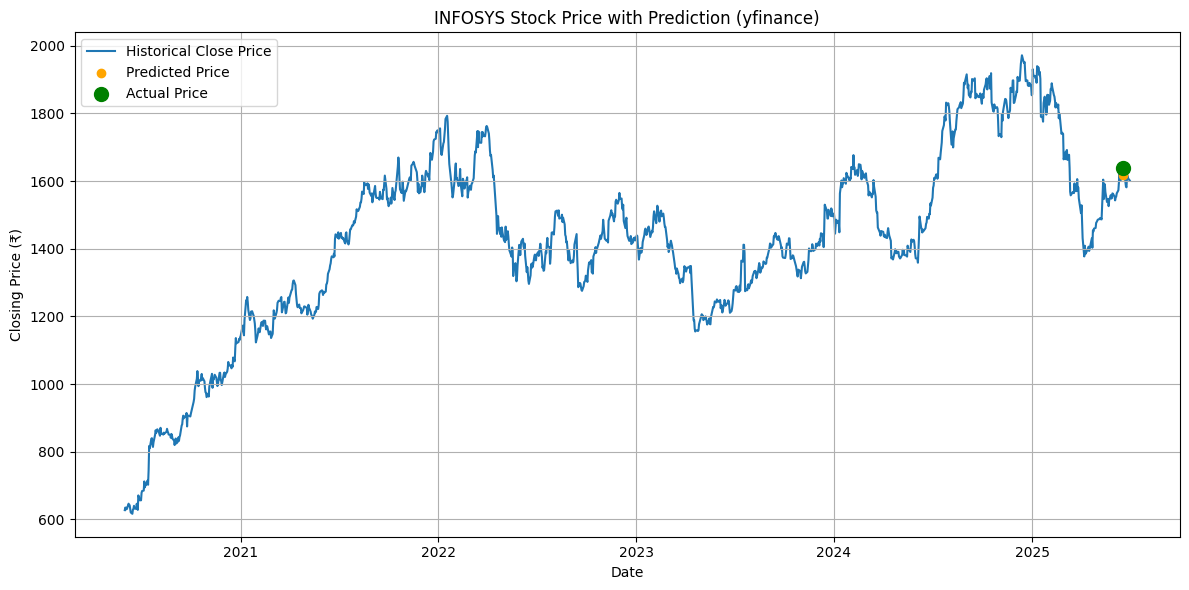


 Test Set Performance Metrics (SimpleRNN):
 Mean Absolute Error (MAE) : ₹15.65
 Mean Squared Error (MSE)  : ₹369.09
 Root Squared Error (RMSE) : ₹19.21
 R² Score                  : 0.5671
 Mean Absolute Percentage Error (MAPE) : 0.98%


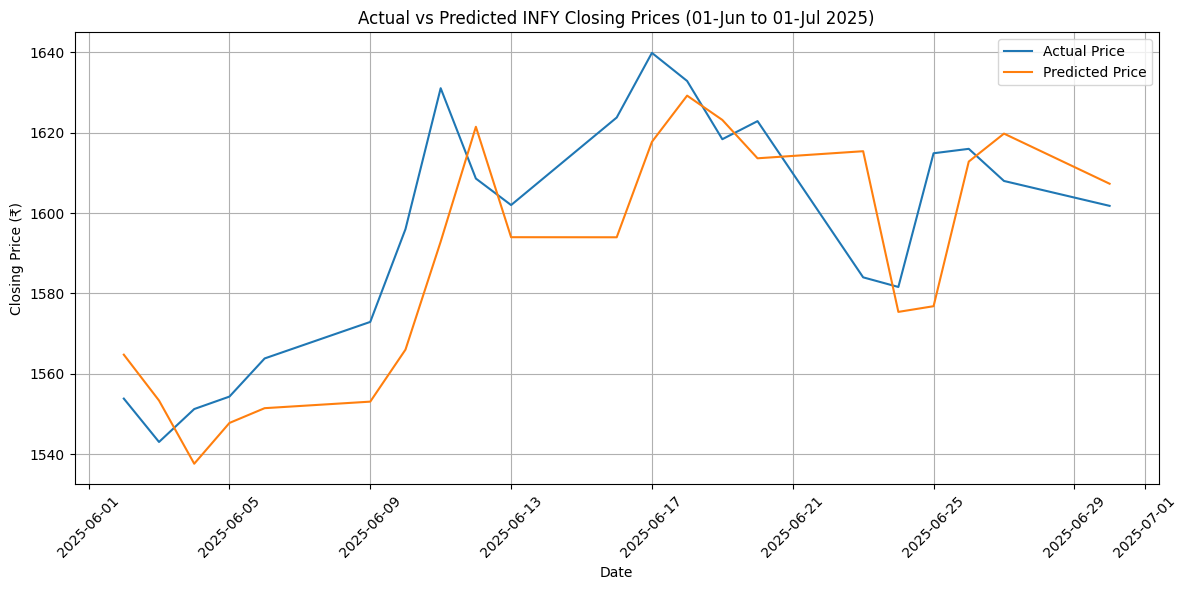

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape):
    #model = Sequential()
    #model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    #model.add(Dense(1))
    #model.compile(optimizer='adam', loss='mean_squared_error')
    #return model
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (SimpleRNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1))
    print("Training SimpleRNN model...")
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100

    print("\n Training Set Performance Metrics (SimpleRNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100

    print("\n Validation Set Performance Metrics (SimpleRNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")

    # Step 5: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 6: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100

    print("\n Test Set Performance Metrics (SimpleRNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
from matplotlib.dates import DateFormatter


=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training RNN model...
Epoch 1/100


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0822 - val_loss: 0.0131
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - val_loss: 0.0120
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.0072
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_l

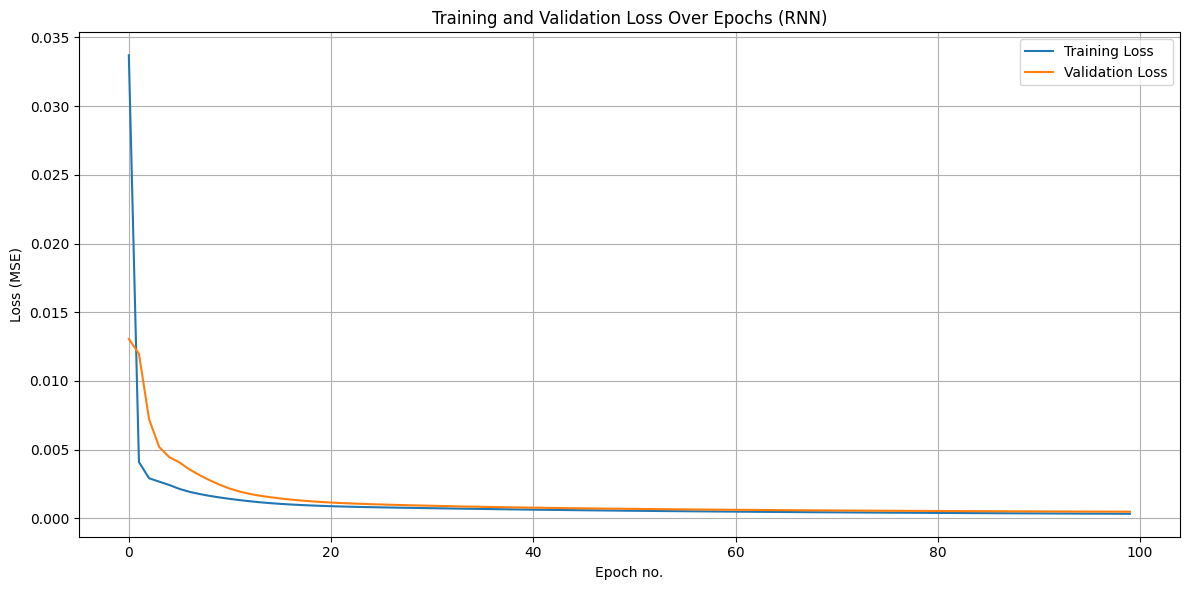


 Training Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹20.22
 Mean Squared Error (MSE)  : ₹699.14
 Root Squared Error (RMSE) : ₹26.44
 R² Score                  : 0.9815
 Mean Absolute Percentage Error (MAPE) : 1.49%

 Validation Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹21.17
 Mean Squared Error (MSE)  : ₹898.26
 Root Squared Error (RMSE) : ₹29.97
 R² Score                  : 0.9641
 Mean Absolute Percentage Error (MAPE) : 1.23%

 Prediction for 2025-06-18:
 Predicted Closing Price: ₹1643.60
 Actual Closing Price   : ₹1632.9000244140625


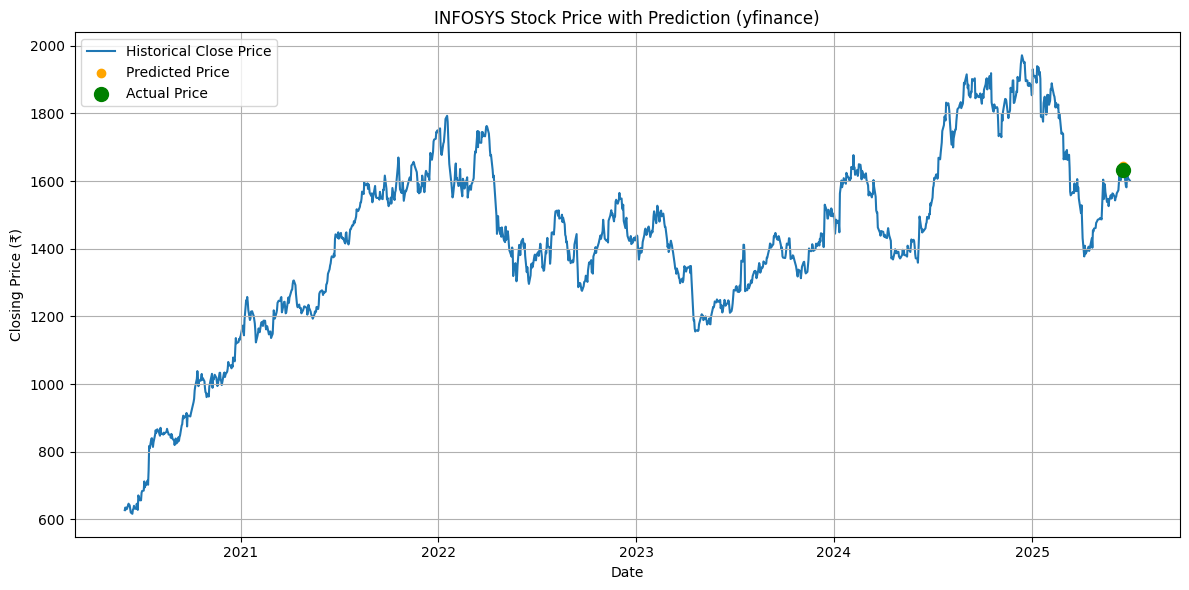


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹18.20
 Mean Squared Error (MSE)  : ₹462.35
 Root Squared Error (RMSE) : ₹21.50
 R² Score                  : 0.4577
 Mean Absolute Percentage Error (MAPE) : 1.14%


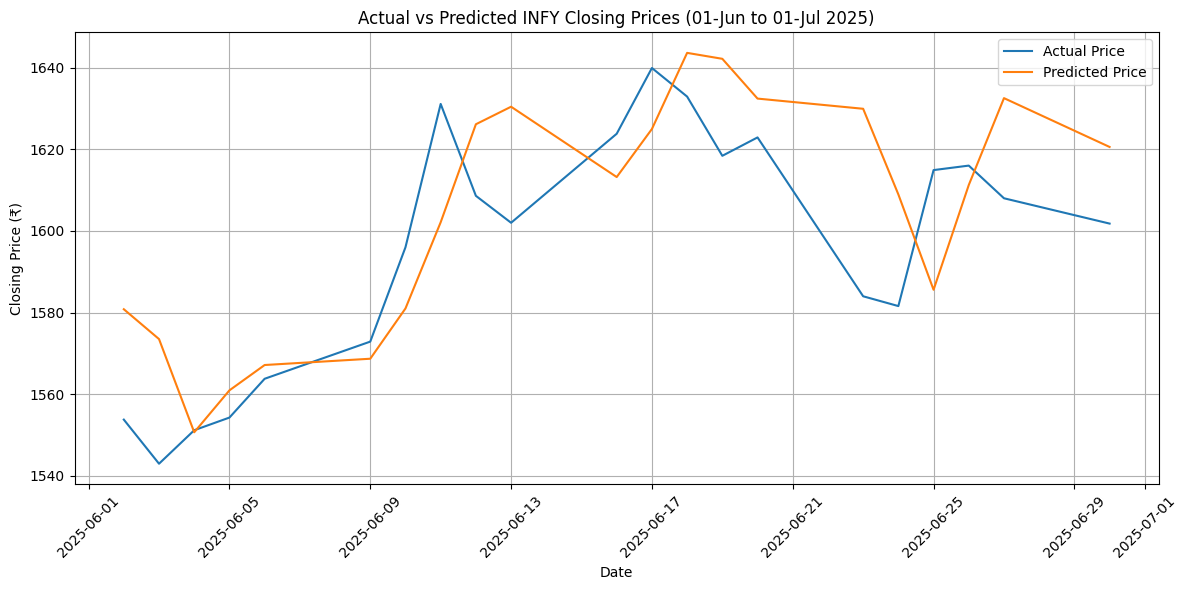

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    #model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1))
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100

    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100

    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")

    # Step 5: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 6: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100

    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Streaming output truncated to the last 5000 lines.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.3328e-05 - val_loss: 8.0841e-04
Epoch 4502/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.3493e-05 - val_loss: 8.0535e-04
Epoch 4503/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.3946e-05 - val_loss: 8.0319e-04
Epoch 4504/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.5249e-05 - val_loss: 8.0065e-04
Epoch 4505/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.7792e-05 - val_loss: 7.9530e-04
Epoch 4506/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.2222e-05 - val_loss: 7.8509e-04
Epoch 4507/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.0303e-05 - val_loss: 7.7954e-04
Epoch 4508/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.5739e-05 - val_loss: 8.1963e-04
Epoch 4509/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.4716e-05 - val_loss: 8.5534e-04
Epoch 4510/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.1903e-05 - val_lo

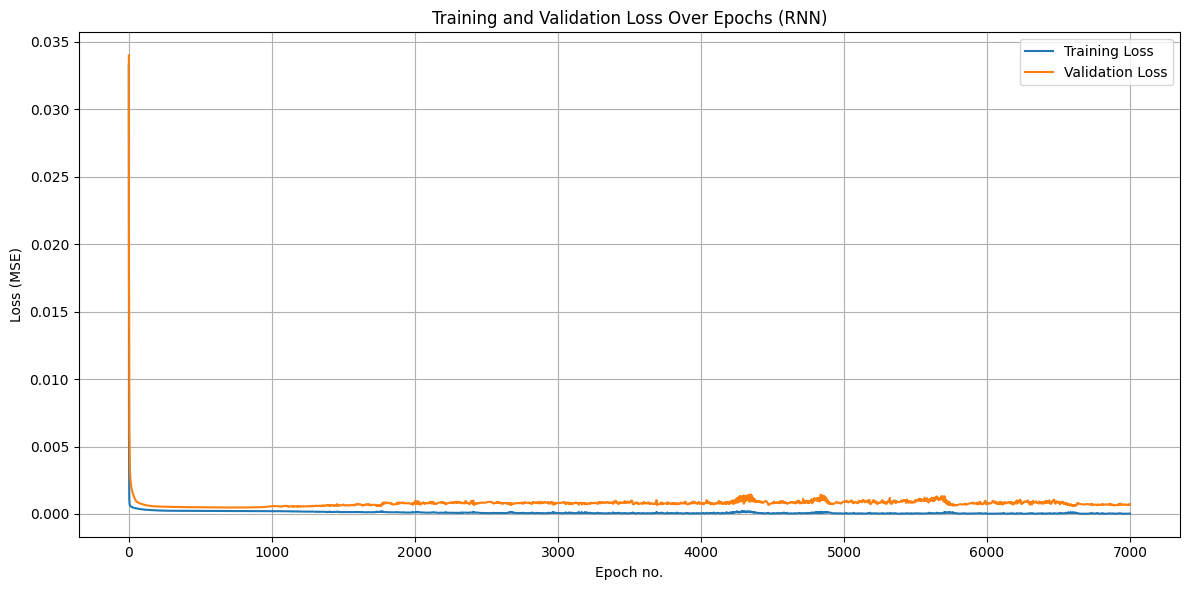


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000037
RL Epoch 2/100, Average Loss per Batch: 0.000030
RL Epoch 3/100, Average Loss per Batch: 0.000020
RL Epoch 4/100, Average Loss per Batch: 0.000017
RL Epoch 5/100, Average Loss per Batch: 0.000016
RL Epoch 6/100, Average Loss per Batch: 0.000016
RL Epoch 7/100, Average Loss per Batch: 0.000014
RL Epoch 8/100, Average Loss per Batch: 0.000014
RL Epoch 9/100, Average Loss per Batch: 0.000013
RL Epoch 10/100, Average Loss per Batch: 0.000012
RL Epoch 11/100, Average Loss per Batch: 0.000012
RL Epoch 12/100, Average Loss per Batch: 0.000013
RL Epoch 13/100, Average Loss per Batch: 0.000014
RL Epoch 14/100, Average Loss per Batch: 0.000021
RL Epoch 15/100, Average Loss per Batch: 0.000034
RL Epoch 16/100, Average Loss per Batch: 0.000040
RL Epoch 17/100, Average Loss per Batch: 0.000022
RL Epoch 18/100, Average Loss per Batch: 0.000017
RL Epoch 19/100, Average Loss per Batch: 0.000

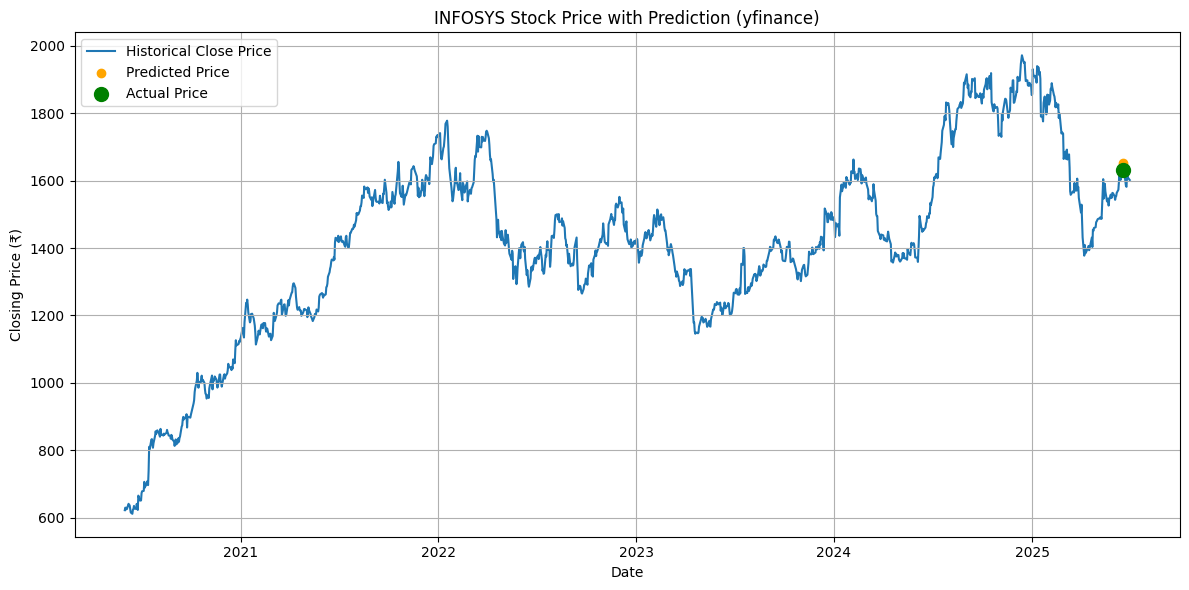


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹21.57
 Mean Squared Error (MSE)  : ₹679.76
 Root Squared Error (RMSE) : ₹26.07
 R² Score                  : 0.2027
 Mean Absolute Percentage Error (MAPE) : 1.35%
 Accuracy (100 - MAPE) : 98.65%
 MSE Percentage of Average Price: 42.59%
 MAE Percentage of Average Price: 1.35%


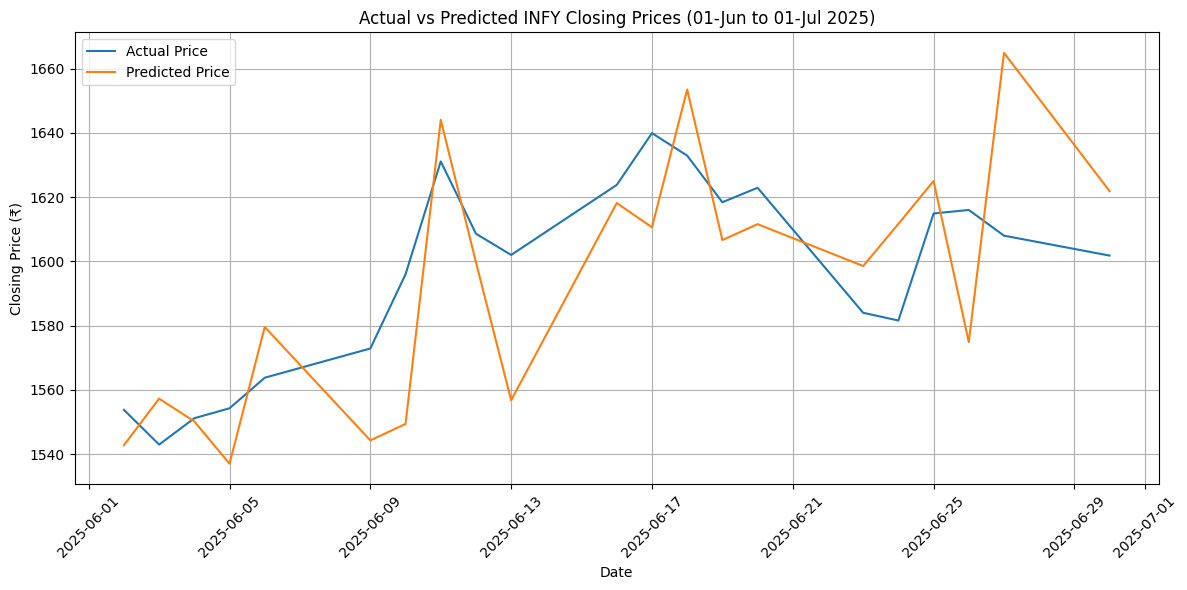

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Use custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Pass learning_rate to RLAgent

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=7000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Streaming output truncated to the last 5000 lines.
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.2576e-05 - val_loss: 0.0015
Epoch 7502/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.8099e-05 - val_loss: 0.0017
Epoch 7503/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.6968e-05 - val_loss: 0.0016
Epoch 7504/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.1794e-05 - val_loss: 0.0016
Epoch 7505/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.6069e-05 - val_loss: 0.0013
Epoch 7506/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.9425e-05 - val_loss: 0.0011
Epoch 7507/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.4082e-05 - val_loss: 0.0012
Epoch 7508/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.5950e-05 - val_loss: 0.0012
Epoch 7509/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.7752e-05 - val_loss: 0.0011
Epoch 7510/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.6069e-05 - val_loss: 0.0012
Epoch 7511/10000

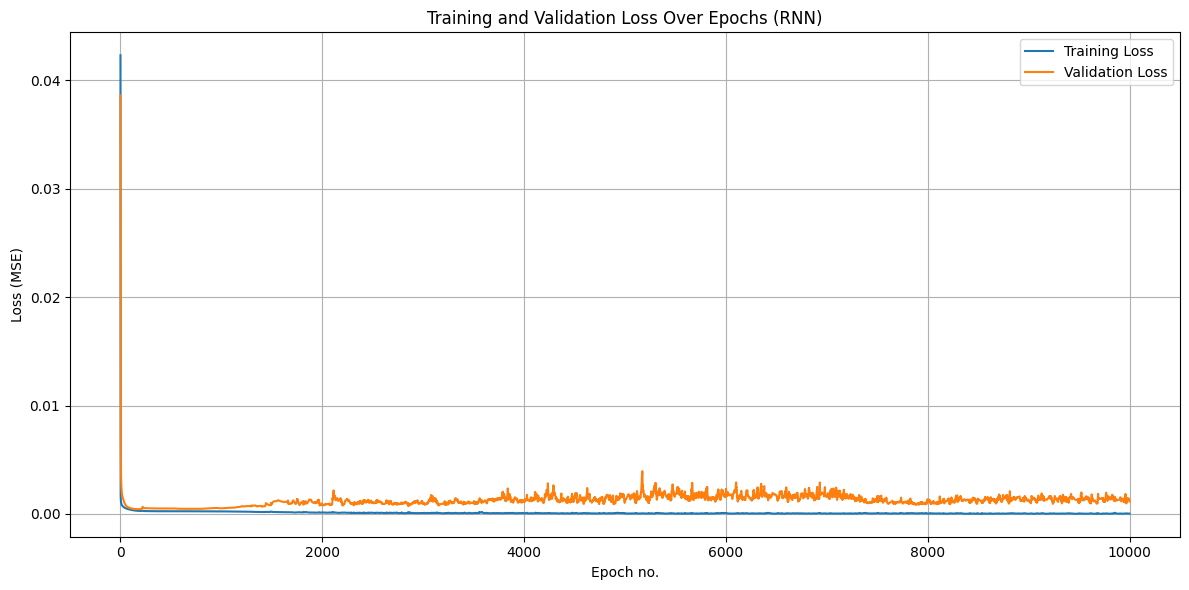


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000025
RL Epoch 2/100, Average Loss per Batch: 0.000019
RL Epoch 3/100, Average Loss per Batch: 0.000017
RL Epoch 4/100, Average Loss per Batch: 0.000013
RL Epoch 5/100, Average Loss per Batch: 0.000010
RL Epoch 6/100, Average Loss per Batch: 0.000010
RL Epoch 7/100, Average Loss per Batch: 0.000009
RL Epoch 8/100, Average Loss per Batch: 0.000008
RL Epoch 9/100, Average Loss per Batch: 0.000007
RL Epoch 10/100, Average Loss per Batch: 0.000007
RL Epoch 11/100, Average Loss per Batch: 0.000007
RL Epoch 12/100, Average Loss per Batch: 0.000006
RL Epoch 13/100, Average Loss per Batch: 0.000006
RL Epoch 14/100, Average Loss per Batch: 0.000006
RL Epoch 15/100, Average Loss per Batch: 0.000006
RL Epoch 16/100, Average Loss per Batch: 0.000006
RL Epoch 17/100, Average Loss per Batch: 0.000005
RL Epoch 18/100, Average Loss per Batch: 0.000005
RL Epoch 19/100, Average Loss per Batch: 0.000

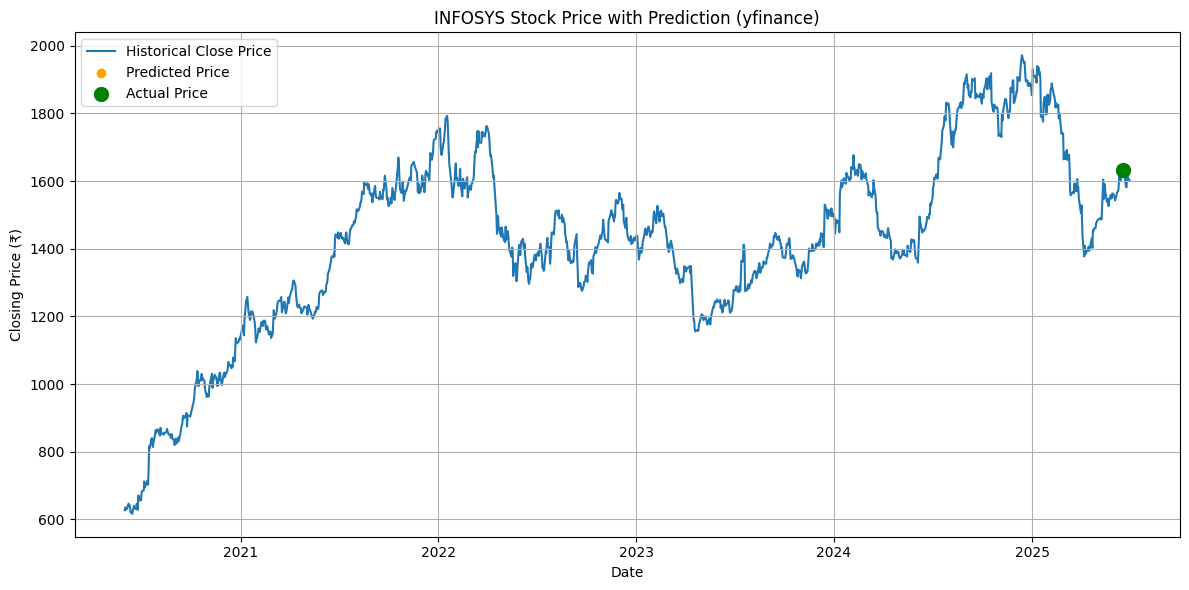


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹20.78
 Mean Squared Error (MSE)  : ₹790.90
 Root Squared Error (RMSE) : ₹28.12
 R² Score                  : 0.0724
 Mean Absolute Percentage Error (MAPE) : 1.30%
 Accuracy (100 - MAPE) : 98.70%
 MSE Percentage of Average Price: 49.55%
 MAE Percentage of Average Price: 1.30%


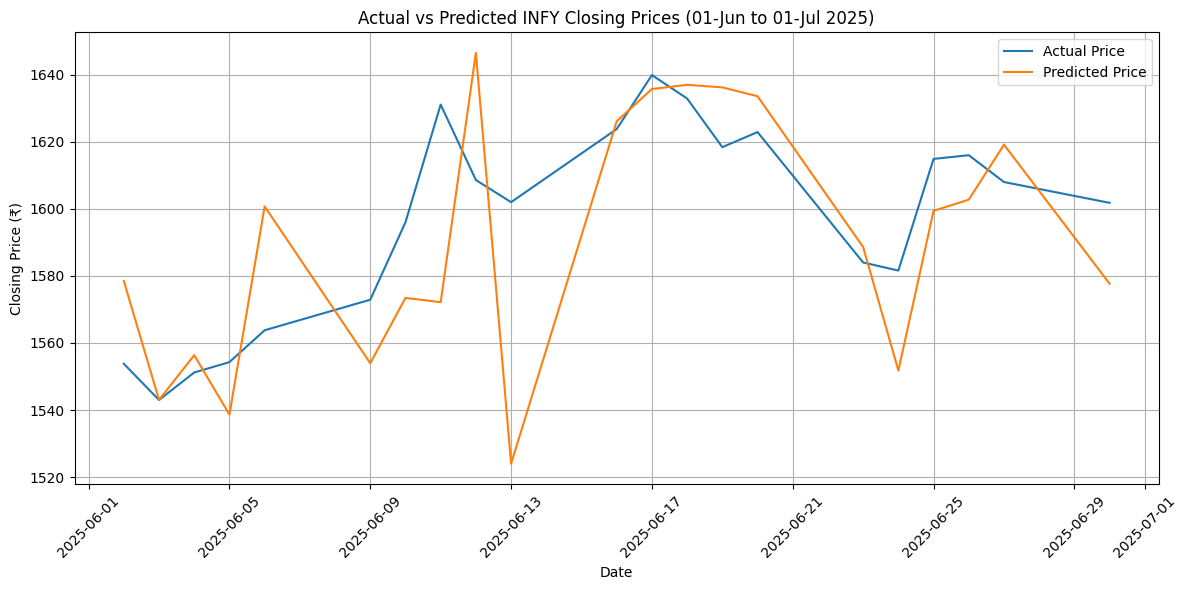

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Use custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Pass learning_rate to RLAgent

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training RNN model...
Epoch 1/5000


Streaming output truncated to the last 5000 lines.
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.4341e-05 - val_loss: 0.0024
Epoch 2502/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.4036e-05 - val_loss: 0.0024
Epoch 2503/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3786e-05 - val_loss: 0.0024
Epoch 2504/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.3598e-05 - val_loss: 0.0024
Epoch 2505/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.3442e-05 - val_loss: 0.0024
Epoch 2506/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.3301e-05 - val_loss: 0.0024
Epoch 2507/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.3173e-05 - val_loss: 0.0024
Epoch 2508/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.3062e-05 - val_loss: 0.0024
Epoch 2509/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.2977e-05 - val_loss: 0.0024
Epoch 2510/5000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.2927e-05 - val_loss: 0.0024
Epoch 2511/5000
30/30 ━━━

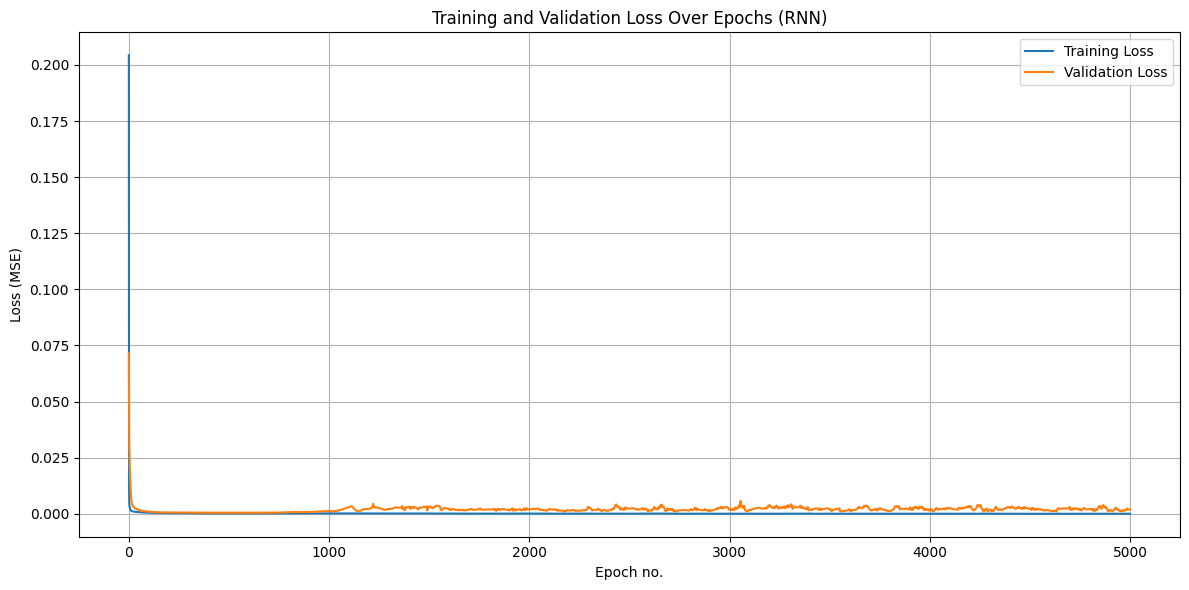


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000028
RL Epoch 2/100, Average Loss per Batch: 0.000022
RL Epoch 3/100, Average Loss per Batch: 0.000017
RL Epoch 4/100, Average Loss per Batch: 0.000016
RL Epoch 5/100, Average Loss per Batch: 0.000017
RL Epoch 6/100, Average Loss per Batch: 0.000016
RL Epoch 7/100, Average Loss per Batch: 0.000019
RL Epoch 8/100, Average Loss per Batch: 0.000018
RL Epoch 9/100, Average Loss per Batch: 0.000025
RL Epoch 10/100, Average Loss per Batch: 0.000024
RL Epoch 11/100, Average Loss per Batch: 0.000024
RL Epoch 12/100, Average Loss per Batch: 0.000018
RL Epoch 13/100, Average Loss per Batch: 0.000014
RL Epoch 14/100, Average Loss per Batch: 0.000013
RL Epoch 15/100, Average Loss per Batch: 0.000012
RL Epoch 16/100, Average Loss per Batch: 0.000012
RL Epoch 17/100, Average Loss per Batch: 0.000012
RL Epoch 18/100, Average Loss per Batch: 0.000012
RL Epoch 19/100, Average Loss per Batch: 0.000

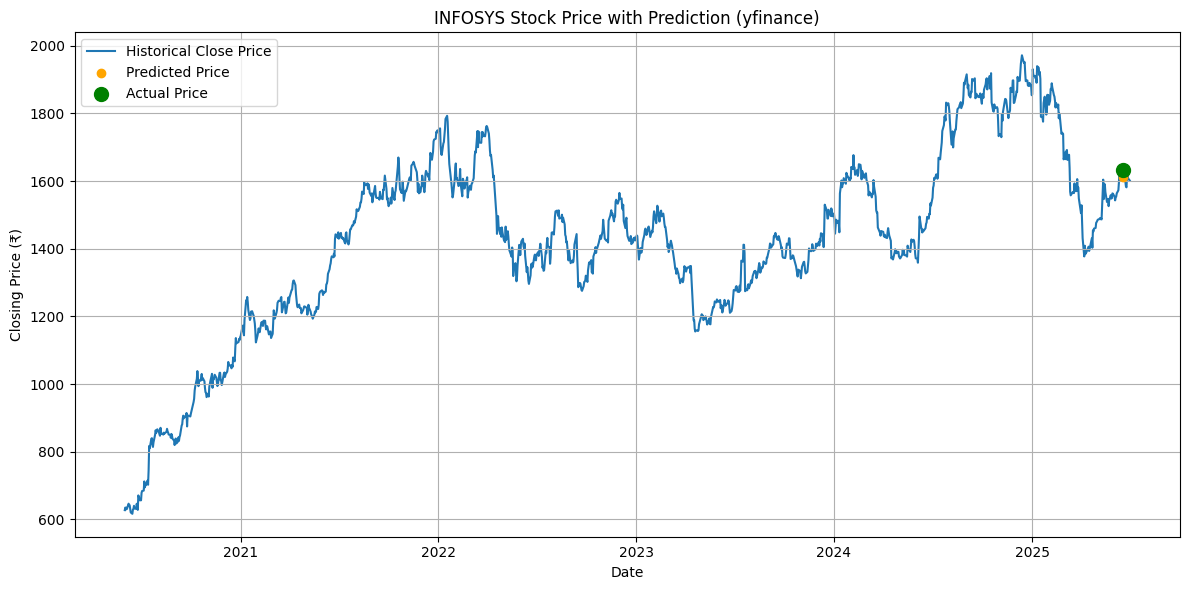


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹24.58
 Mean Squared Error (MSE)  : ₹926.53
 Root Squared Error (RMSE) : ₹30.44
 R² Score                  : -0.0867
 Mean Absolute Percentage Error (MAPE) : 1.53%
 Accuracy (100 - MAPE) : 98.47%
 MSE Percentage of Average Price: 58.04%
 MAE Percentage of Average Price: 1.54%


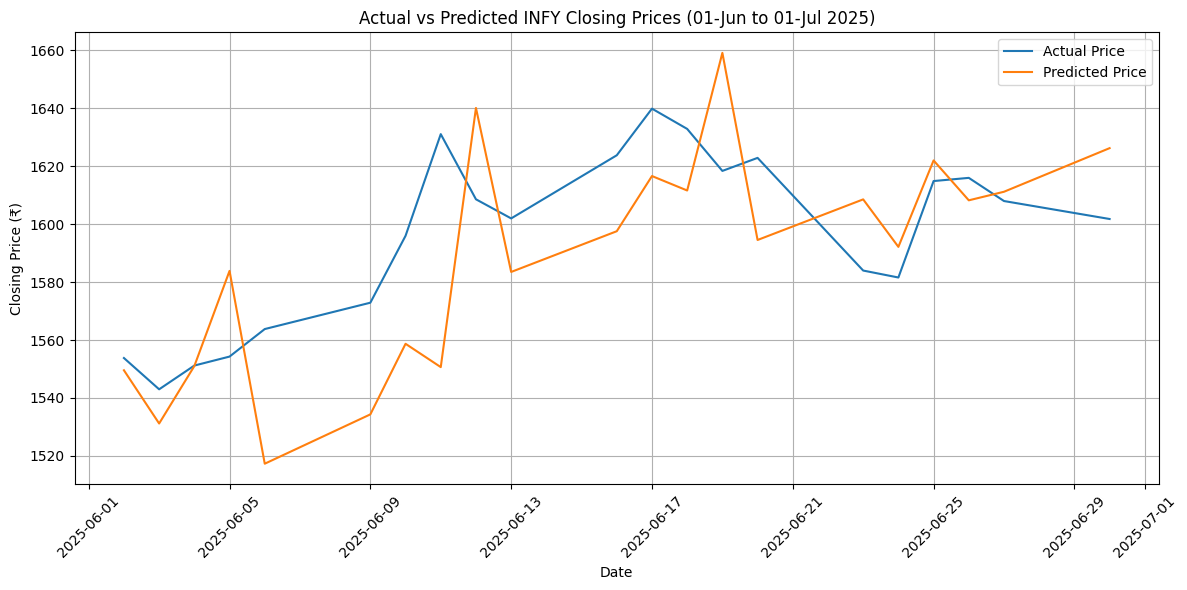

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Use custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Pass learning_rate to RLAgent

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training RNN model...
Epoch 1/2000


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0286 - val_loss: 0.0284
Epoch 2/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0030 - val_loss: 0.0101
Epoch 3/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0019 - val_loss: 0.0067
Epoch 4/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 5/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 6/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 7/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 8/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.5103e-04 - val_loss: 0.0022
Epoch 9/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6349e-04 - val_loss: 0.0020
Epoch 10/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.9932e-04 - val_loss: 0.0018
Epoch 11/2000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.5112e-04 - val_loss: 0.0017
Epoch 12/2000
30/30 ━━━━━━━━━━━━━━━━━━

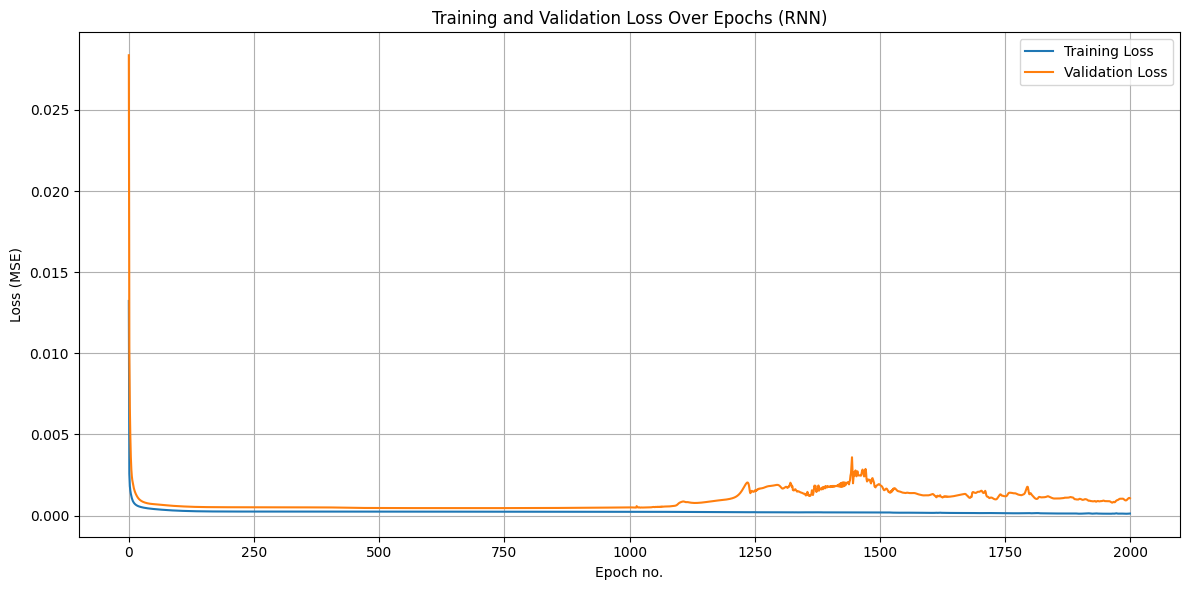


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000125
RL Epoch 2/100, Average Loss per Batch: 0.000105
RL Epoch 3/100, Average Loss per Batch: 0.000108
RL Epoch 4/100, Average Loss per Batch: 0.000095
RL Epoch 5/100, Average Loss per Batch: 0.000094
RL Epoch 6/100, Average Loss per Batch: 0.000091
RL Epoch 7/100, Average Loss per Batch: 0.000101
RL Epoch 8/100, Average Loss per Batch: 0.000092
RL Epoch 9/100, Average Loss per Batch: 0.000088
RL Epoch 10/100, Average Loss per Batch: 0.000085
RL Epoch 11/100, Average Loss per Batch: 0.000091
RL Epoch 12/100, Average Loss per Batch: 0.000094
RL Epoch 13/100, Average Loss per Batch: 0.000088
RL Epoch 14/100, Average Loss per Batch: 0.000085
RL Epoch 15/100, Average Loss per Batch: 0.000084
RL Epoch 16/100, Average Loss per Batch: 0.000093
RL Epoch 17/100, Average Loss per Batch: 0.000106
RL Epoch 18/100, Average Loss per Batch: 0.000090
RL Epoch 19/100, Average Loss per Batch: 0.000

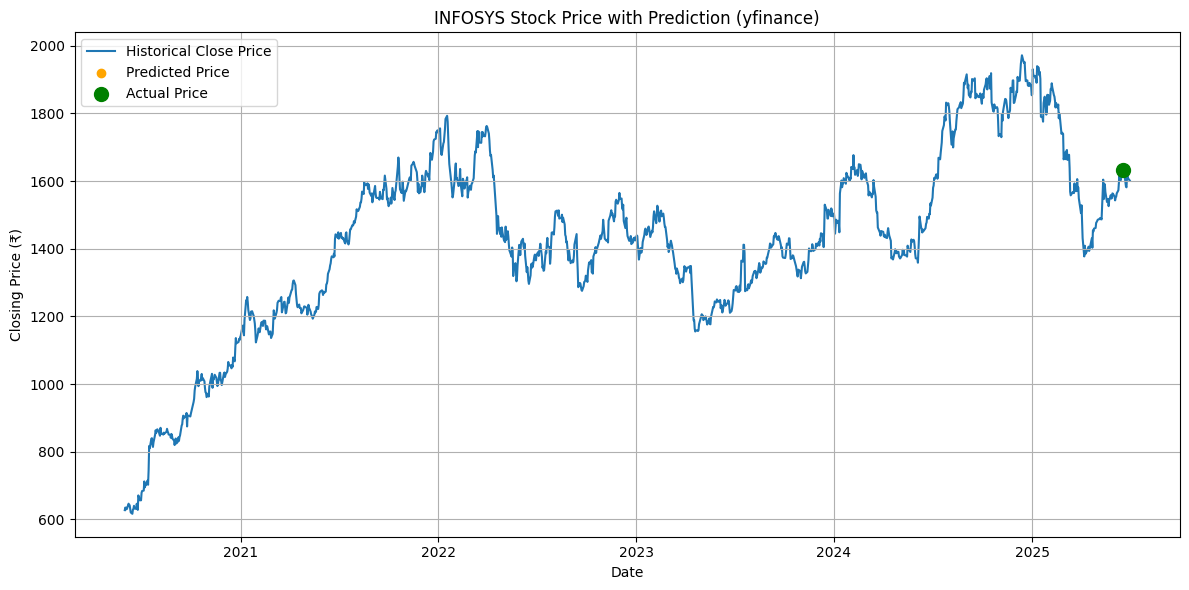


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹23.96
 Mean Squared Error (MSE)  : ₹829.03
 Root Squared Error (RMSE) : ₹28.79
 R² Score                  : 0.0277
 Mean Absolute Percentage Error (MAPE) : 1.51%
 Accuracy (100 - MAPE) : 98.49%
 MSE Percentage of Average Price: 51.94%
 MAE Percentage of Average Price: 1.50%


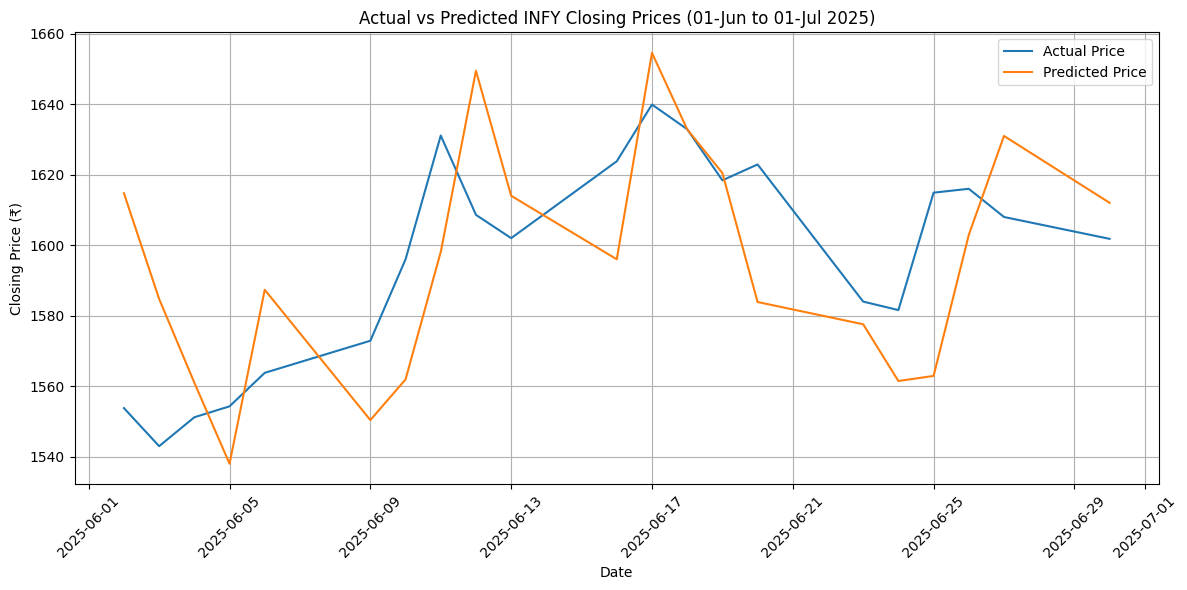

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Use custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Pass learning_rate to RLAgent

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed

Training RNN model...
Epoch 1/1000


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0112 - val_loss: 0.0066
Epoch 2/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010 - val_loss: 0.0034
Epoch 3/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.1369e-04 - val_loss: 0.0024
Epoch 4/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.5971e-04 - val_loss: 0.0022
Epoch 5/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0085e-04 - val_loss: 0.0019
Epoch 6/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6844e-04 - val_loss: 0.0017
Epoch 7/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.3911e-04 - val_loss: 0.0015
Epoch 8/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.1446e-04 - val_loss: 0.0014
Epoch 9/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9263e-04 - val_loss: 0.0013
Epoch 10/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.7211e-04 - val_loss: 0.0012
Epoch 11/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.5195e-04 - val_loss: 0.0011
Epoch 12/1000
30/3

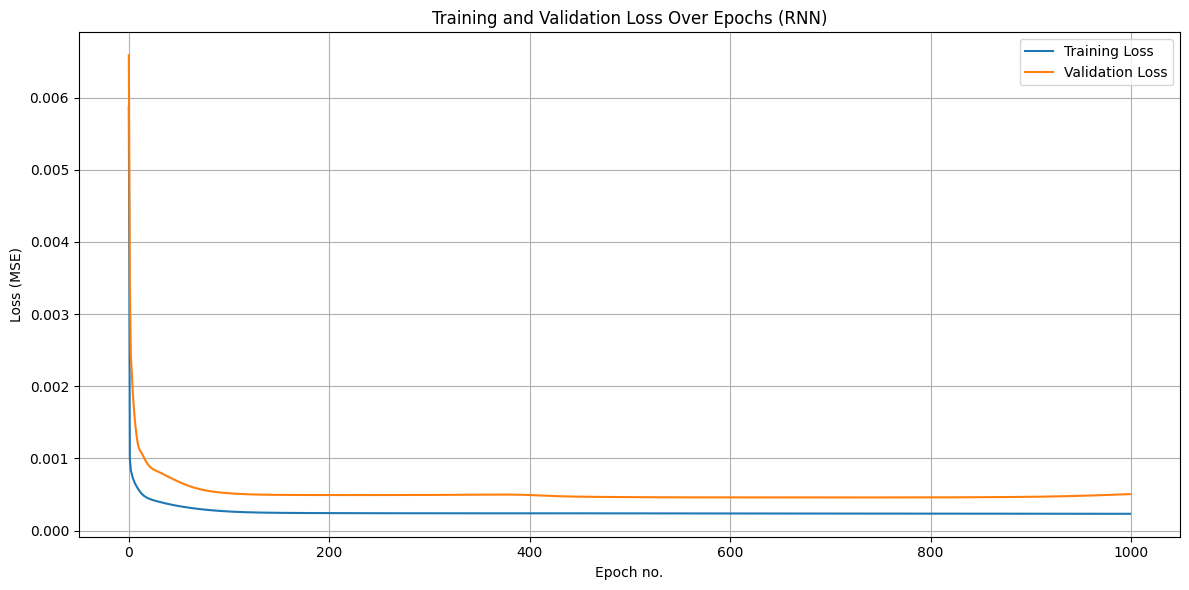


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/80, Average Loss per Batch: 0.000237
RL Epoch 2/80, Average Loss per Batch: 0.000235
RL Epoch 3/80, Average Loss per Batch: 0.000232
RL Epoch 4/80, Average Loss per Batch: 0.000232
RL Epoch 5/80, Average Loss per Batch: 0.000231
RL Epoch 6/80, Average Loss per Batch: 0.000232
RL Epoch 7/80, Average Loss per Batch: 0.000231
RL Epoch 8/80, Average Loss per Batch: 0.000232
RL Epoch 9/80, Average Loss per Batch: 0.000231
RL Epoch 10/80, Average Loss per Batch: 0.000232
RL Epoch 11/80, Average Loss per Batch: 0.000231
RL Epoch 12/80, Average Loss per Batch: 0.000232
RL Epoch 13/80, Average Loss per Batch: 0.000231
RL Epoch 14/80, Average Loss per Batch: 0.000232
RL Epoch 15/80, Average Loss per Batch: 0.000231
RL Epoch 16/80, Average Loss per Batch: 0.000232
RL Epoch 17/80, Average Loss per Batch: 0.000231
RL Epoch 18/80, Average Loss per Batch: 0.000231
RL Epoch 19/80, Average Loss per Batch: 0.000231
RL Epoch 20/80,

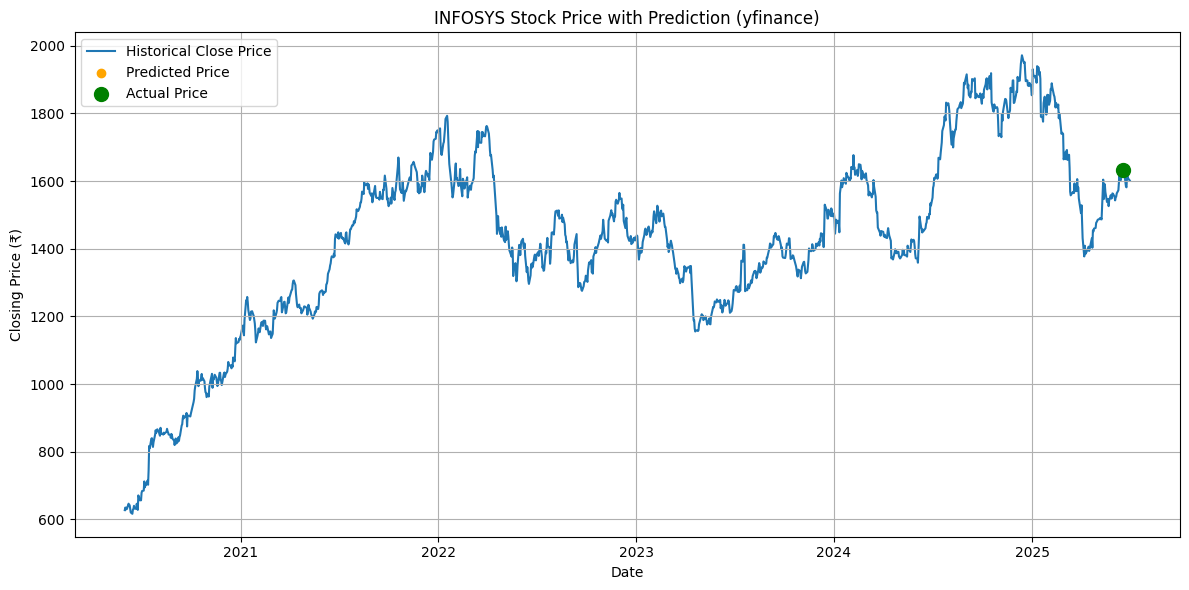


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹18.12
 Mean Squared Error (MSE)  : ₹477.93
 Root Squared Error (RMSE) : ₹21.86
 R² Score                  : 0.4395
 Mean Absolute Percentage Error (MAPE) : 1.13%


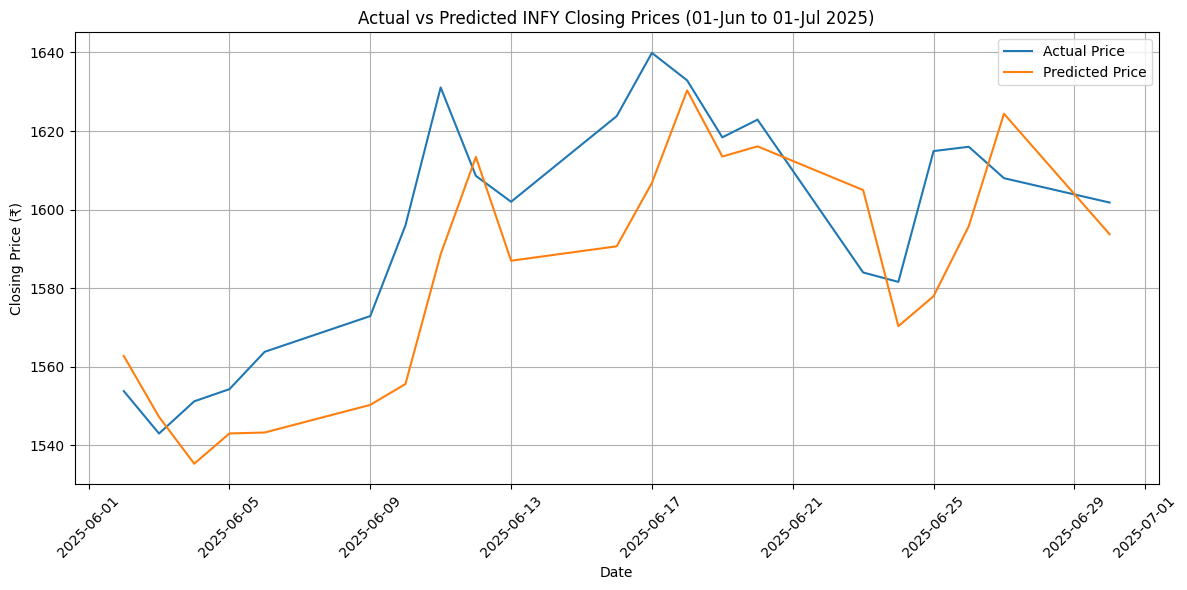

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Use custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Pass learning_rate to RLAgent

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    # Increased epochs to 80 to allow more time for batched training to converge
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)


    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train

    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val

    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")

    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test

    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Training RNN model...
Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.1582 - val_loss: 0.0563
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - val_loss: 0.0251
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0176
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - val_loss: 0.0141
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0112
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0090
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - val_loss: 0.0063
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━

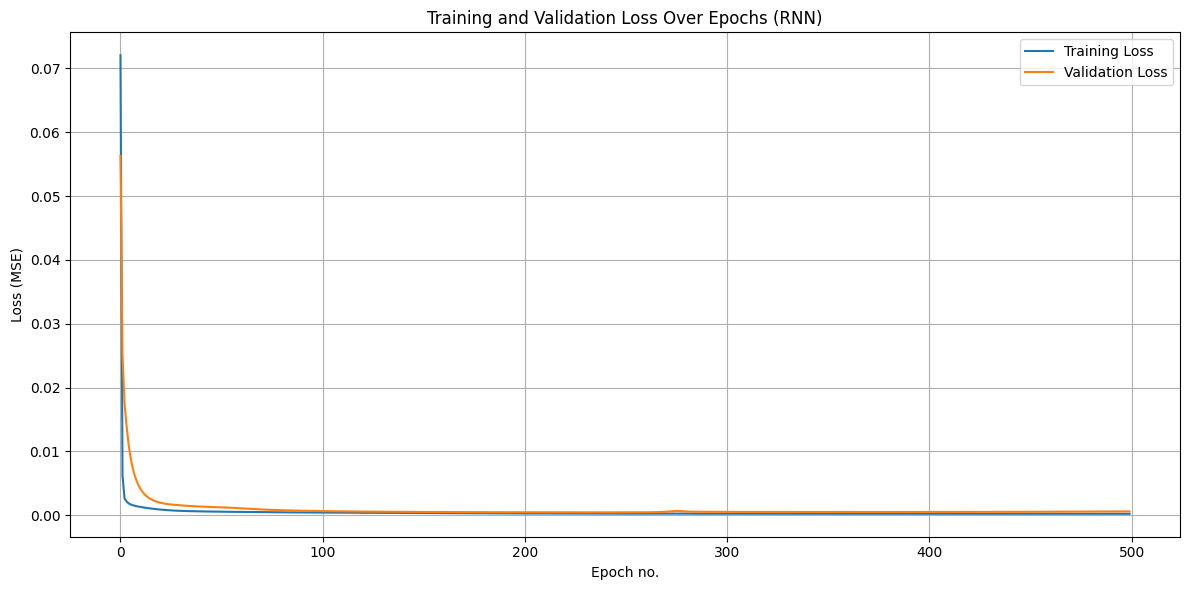


--- Starting Reinforcement Learning Fine-Tuning ---
RL Epoch 1/150, Total Loss: 0.24
RL Epoch 2/150, Total Loss: 0.24


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Use custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) # Pass learning_rate to RLAgent

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss

def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Reshape X_train for the model
    X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X_train_reshaped)):
            state = X_train_reshaped[i:i+1]
            target = y_train[i:i+1].reshape(1,1)

            loss = agent.train_step(state, target)
            total_loss += loss.numpy()

        print(f"RL Epoch {epoch + 1}/{epochs}, Total Loss: {total_loss:.2f}")
    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001) # Reduced learning rate and epochs


    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100

    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100

    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")

    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100

    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...


Training RNN model...
Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1405 - val_loss: 0.0169
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.4195e-04 - val_loss: 0.0013
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4012e-04 - val_loss: 0.0013
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.8353e-04 - val_loss: 0.0011
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.1766e-04 - val_loss: 0.0011
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.7922e-04 - val_loss: 0.0010
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.4085e-04 - val_loss: 9.4222e-04
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0201e-04 - val_loss: 8.6924e-04
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.6572e-04 - val_loss: 8.0022e-04
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3499e-04 -

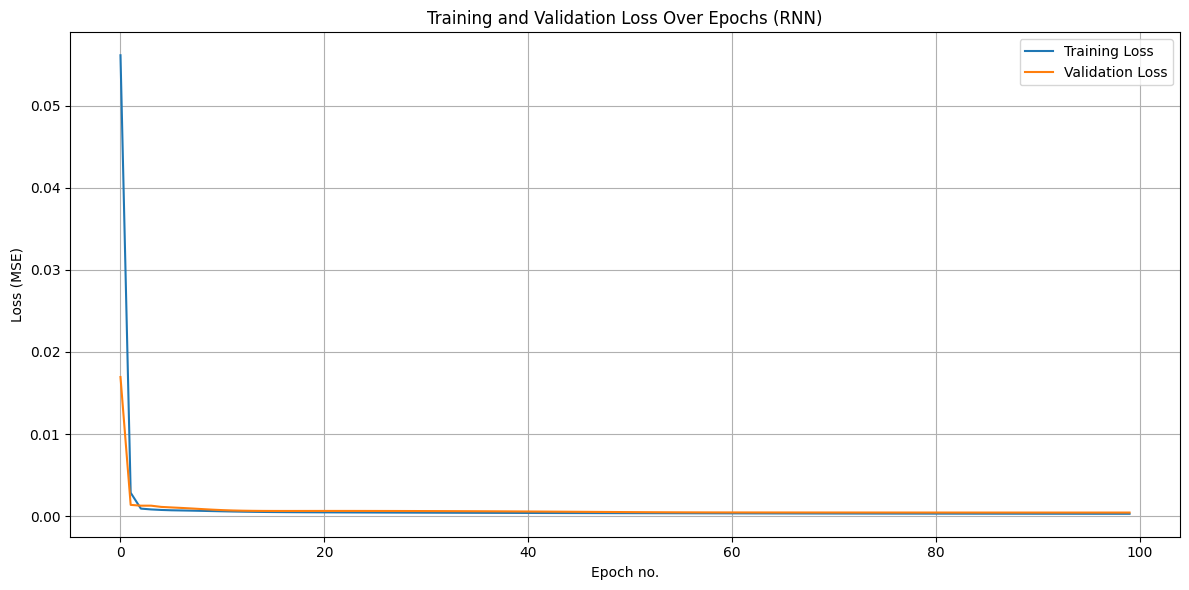


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000263
RL Epoch 2/100, Average Loss per Batch: 0.000306
RL Epoch 3/100, Average Loss per Batch: 0.000296
RL Epoch 4/100, Average Loss per Batch: 0.000274
RL Epoch 5/100, Average Loss per Batch: 0.000270
RL Epoch 6/100, Average Loss per Batch: 0.000271
RL Epoch 7/100, Average Loss per Batch: 0.000273
RL Epoch 8/100, Average Loss per Batch: 0.000273
RL Epoch 9/100, Average Loss per Batch: 0.000273
RL Epoch 10/100, Average Loss per Batch: 0.000272
RL Epoch 11/100, Average Loss per Batch: 0.000272
RL Epoch 12/100, Average Loss per Batch: 0.000271
RL Epoch 13/100, Average Loss per Batch: 0.000271
RL Epoch 14/100, Average Loss per Batch: 0.000271
RL Epoch 15/100, Average Loss per Batch: 0.000270
RL Epoch 16/100, Average Loss per Batch: 0.000270
RL Epoch 17/100, Average Loss per Batch: 0.000270
RL Epoch 18/100, Average Loss per Batch: 0.000269
RL Epoch 19/100, Average Loss per Batch: 0.000

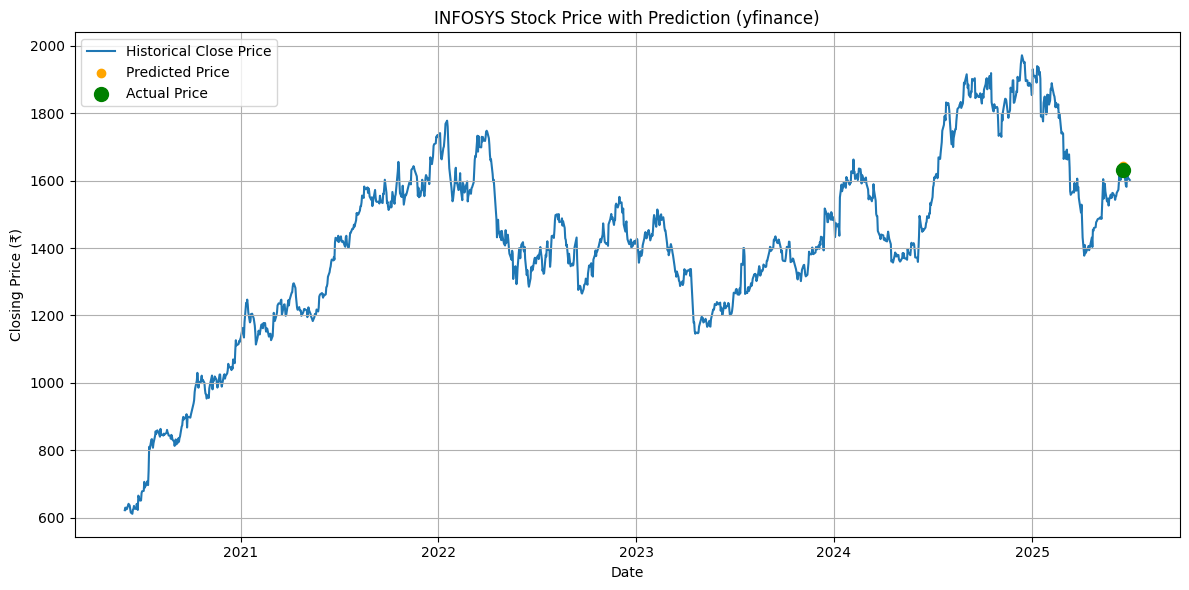


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹16.22
 Mean Squared Error (MSE)  : ₹370.60
 Root Squared Error (RMSE) : ₹19.25
 R² Score                  : 0.5653
 Mean Absolute Percentage Error (MAPE) : 1.02%
 Accuracy (100 - MAPE) : 98.98%
 Mean Squared Error as percentage of average price(%) : 23.22%
 Mean Absolute Error as percentage of average price(%) : 1.02%


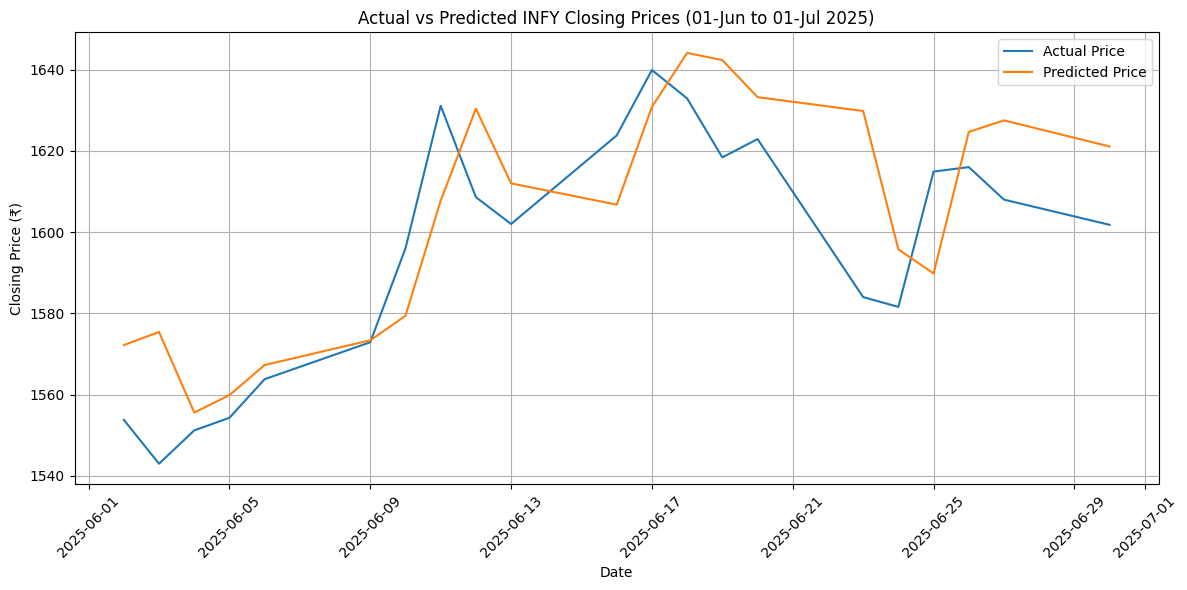

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss

def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model

def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1))
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)


    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan

    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_train:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan

    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_val:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_val:.2f}%")

    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan

    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_test:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training RNN model...
Epoch 1/500


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0092 - val_loss: 0.0015
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.7722e-04 - val_loss: 0.0011
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.6435e-04 - val_loss: 9.5956e-04
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.0817e-04 - val_loss: 8.7616e-04
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.7397e-04 - val_loss: 8.4111e-04
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.6685e-04 - val_loss: 8.1432e-04
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.4851e-04 - val_loss: 7.9197e-04
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.2748e-04 - val_loss: 7.7122e-04
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.0642e-04 - val_loss: 7.5306e-04
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.8723e-04 - val_loss: 7.3715e

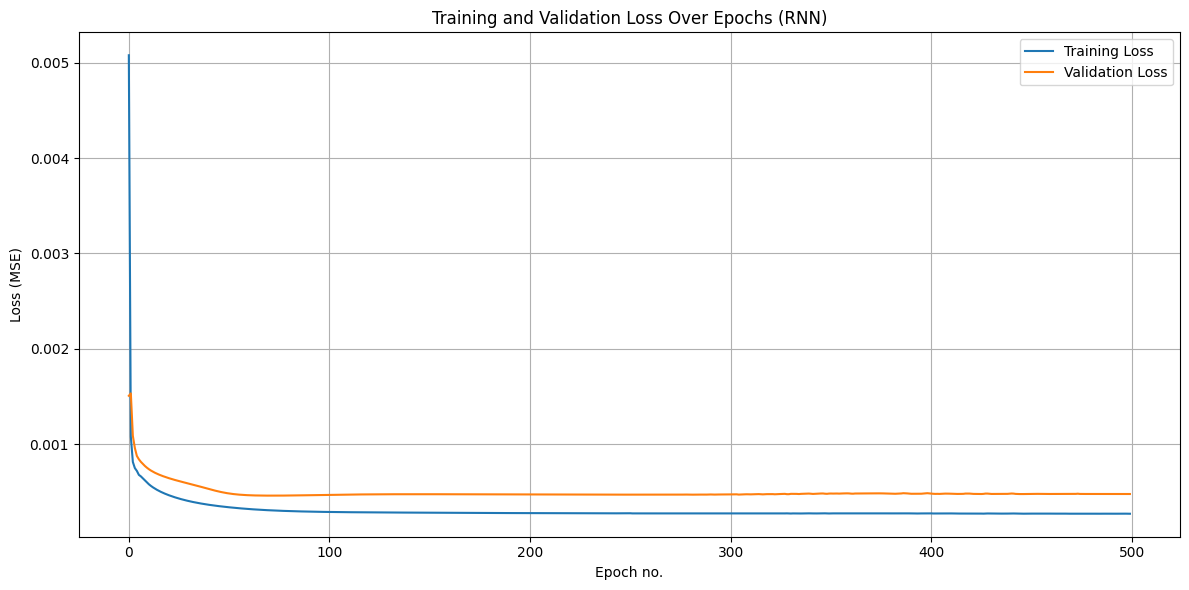


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000252
RL Epoch 2/100, Average Loss per Batch: 0.000268
RL Epoch 3/100, Average Loss per Batch: 0.000269
RL Epoch 4/100, Average Loss per Batch: 0.000266
RL Epoch 5/100, Average Loss per Batch: 0.000263
RL Epoch 6/100, Average Loss per Batch: 0.000261
RL Epoch 7/100, Average Loss per Batch: 0.000261
RL Epoch 8/100, Average Loss per Batch: 0.000260
RL Epoch 9/100, Average Loss per Batch: 0.000260
RL Epoch 10/100, Average Loss per Batch: 0.000260
RL Epoch 11/100, Average Loss per Batch: 0.000260
RL Epoch 12/100, Average Loss per Batch: 0.000260
RL Epoch 13/100, Average Loss per Batch: 0.000259
RL Epoch 14/100, Average Loss per Batch: 0.000259
RL Epoch 15/100, Average Loss per Batch: 0.000259
RL Epoch 16/100, Average Loss per Batch: 0.000259
RL Epoch 17/100, Average Loss per Batch: 0.000259
RL Epoch 18/100, Average Loss per Batch: 0.000259
RL Epoch 19/100, Average Loss per Batch: 0.000

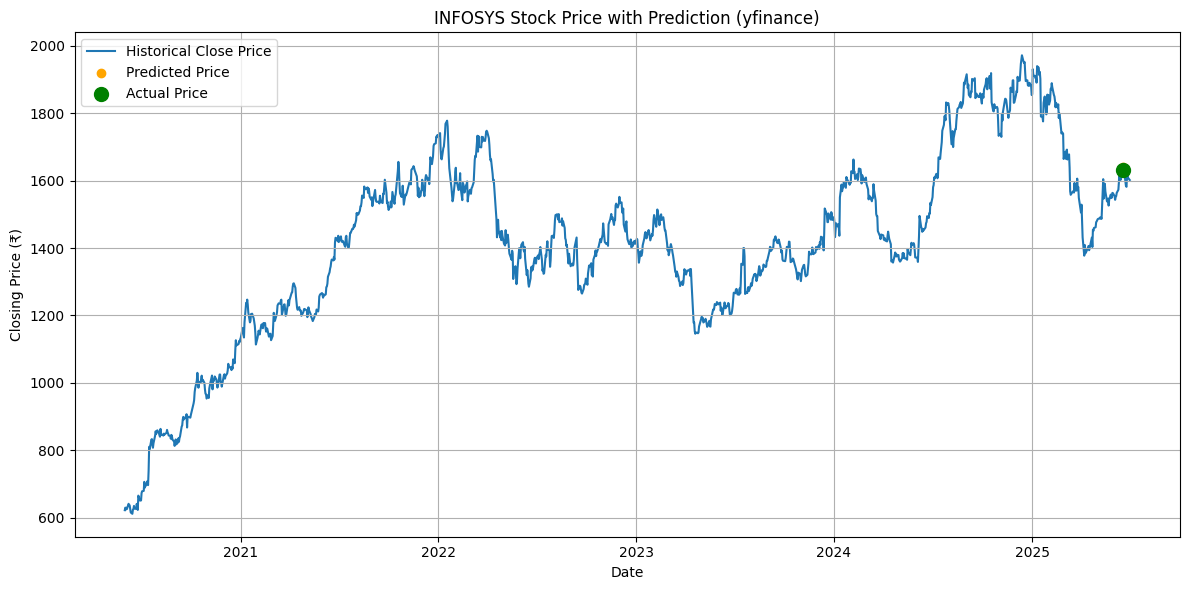


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹14.03
 Mean Squared Error (MSE)  : ₹288.31
 Root Squared Error (RMSE) : ₹16.98
 R² Score                  : 0.6619
 Mean Absolute Percentage Error (MAPE) : 0.88%
 Accuracy (100 - MAPE) : 99.12%
 Mean Squared Error as percentage of average price(%) : 18.06%
 Mean Absolute Error as percentage of average price(%) : 0.88%


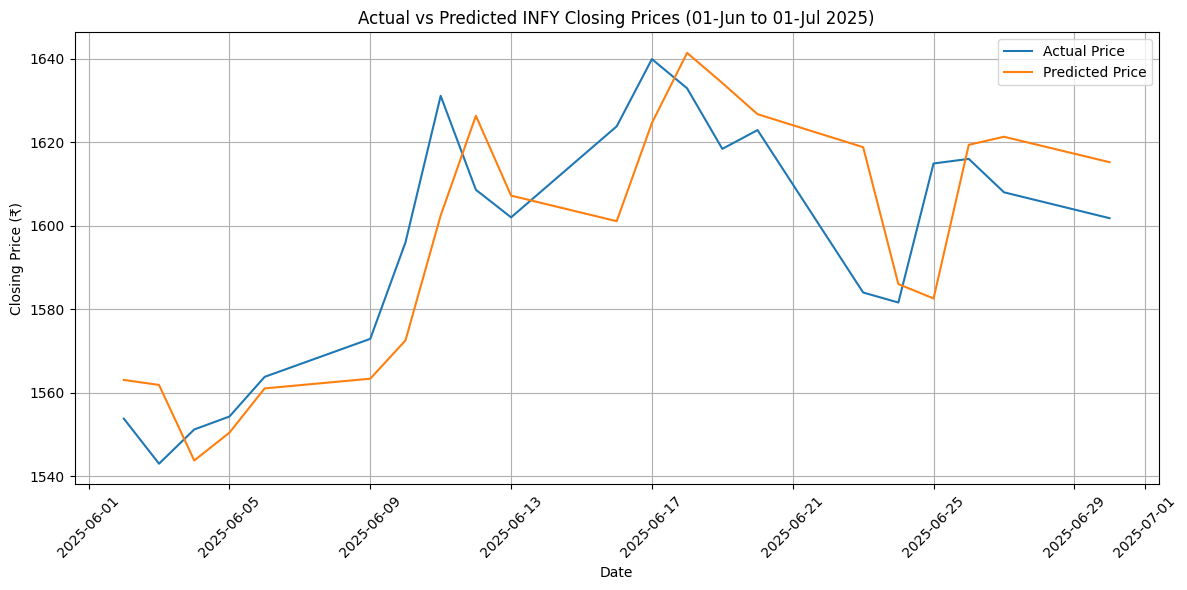

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss

def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model

def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1))
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)


    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan

    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_train:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan

    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_val:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_val:.2f}%")

    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan

    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_test:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Training RNN model...
Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0419 - val_loss: 0.0026
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.7568e-04 - val_loss: 0.0012
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.3911e-04 - val_loss: 0.0011
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.0936e-04 - val_loss: 0.0011
Epoch 1

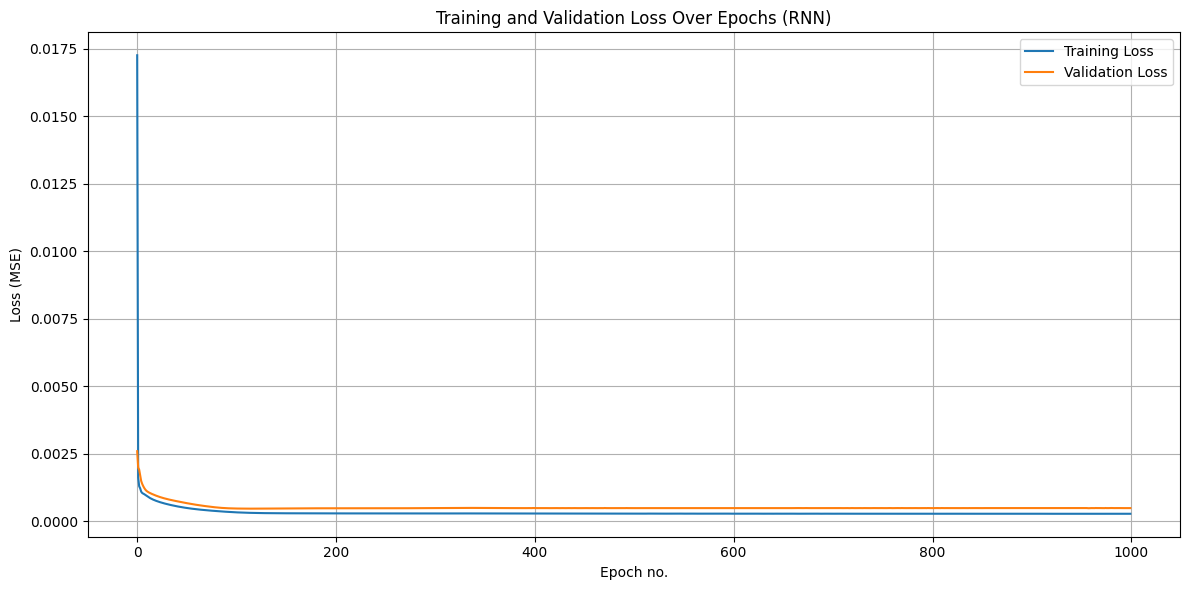


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/100, Average Loss per Batch: 0.000260
RL Epoch 2/100, Average Loss per Batch: 0.000269
RL Epoch 3/100, Average Loss per Batch: 0.000267
RL Epoch 4/100, Average Loss per Batch: 0.000265
RL Epoch 5/100, Average Loss per Batch: 0.000264
RL Epoch 6/100, Average Loss per Batch: 0.000263
RL Epoch 7/100, Average Loss per Batch: 0.000263
RL Epoch 8/100, Average Loss per Batch: 0.000262
RL Epoch 9/100, Average Loss per Batch: 0.000262
RL Epoch 10/100, Average Loss per Batch: 0.000262
RL Epoch 11/100, Average Loss per Batch: 0.000262
RL Epoch 12/100, Average Loss per Batch: 0.000262
RL Epoch 13/100, Average Loss per Batch: 0.000262
RL Epoch 14/100, Average Loss per Batch: 0.000262
RL Epoch 15/100, Average Loss per Batch: 0.000262
RL Epoch 16/100, Average Loss per Batch: 0.000262
RL Epoch 17/100, Average Loss per Batch: 0.000262
RL Epoch 18/100, Average Loss per Batch: 0.000262
RL Epoch 19/100, Average Loss per Batch: 0.000

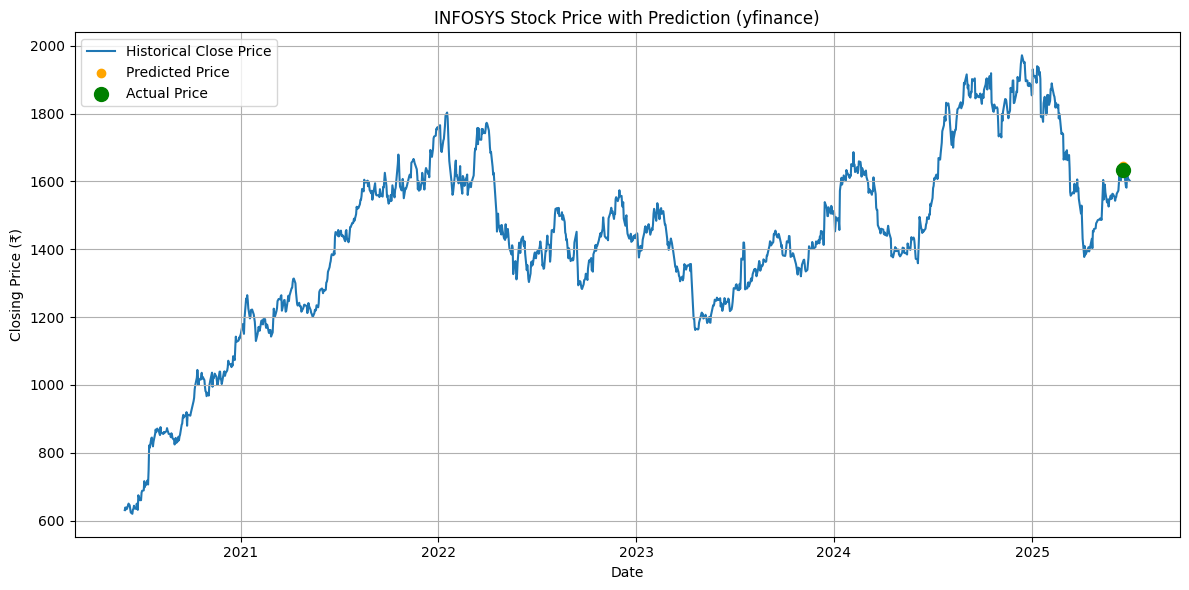


 Test Set Performance Metrics (RNN):
 Mean Absolute Error (MAE) : ₹15.09
 Mean Squared Error (MSE)  : ₹309.10
 Root Squared Error (RMSE) : ₹17.58
 R² Score                  : 0.6375
 Mean Absolute Percentage Error (MAPE) : 0.94%
 Accuracy (100 - MAPE) : 99.06%
 Mean Squared Error as percentage of average price(%) : 19.36%
 Mean Absolute Error as percentage of average price(%) : 0.95%


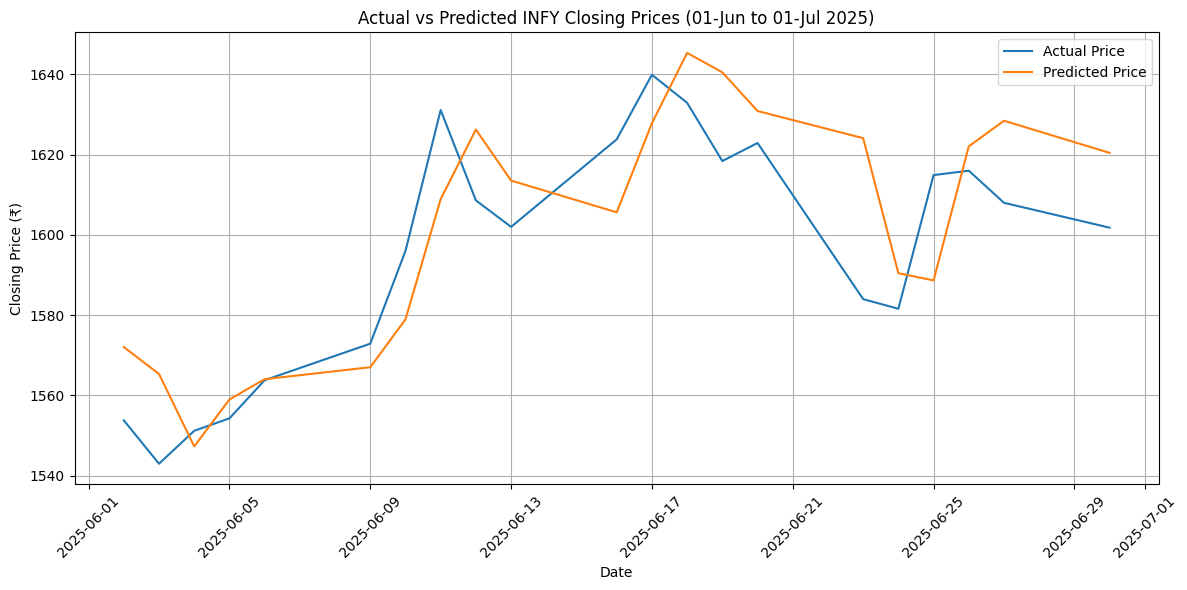

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the SimpleRNN model
def build_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss

def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model

def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (RNN)")
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===")
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1))
    print("Training RNN model...")
    history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=100, learning_rate=0.0001, batch_size=32)


    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan

    print("\n Training Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_train:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan

    print("\n Validation Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_val:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_val:.2f}%")

    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan

    print("\n Test Set Performance Metrics (RNN):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" Mean Squared Error as percentage of average price(%) : {mse_percent_test:.2f}%")
    print(f" Mean Absolute Error as percentage of average price(%) : {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()